In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from time import time

In [2]:
faces = pd.read_csv('FGNet-LOPO.csv')
x = faces.drop(["age", "ID", "Gender_0M_1F"], axis = 1)
y = faces[["age", "ID", "Gender_0M_1F"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2)
scores_5fold = {}
dic = {}

In [3]:
from functools import singledispatchmethod
from typing import Generator, Tuple, Union
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

errors = []
errMean = []

class LOPOCV:

    def __init__(self) -> None:
        pass

    @singledispatchmethod
    def split(self, X, y, groups=None):
        raise Exception(
            'Both X and y must be either a numpy array or DataFrame.'
        )

    @split.register
    def _(self, X: np.ndarray, y: np.ndarray, groups=None):
        ...

    @split.register
    def _(
        self, X: pd.DataFrame, y: Union[pd.DataFrame, pd.Series], groups=None
    ) -> Generator[Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame], None, None]:
        Xy = X.join(y)

        for id in y['ID'].unique():
            split, valset = Xy[Xy['ID'] != id], Xy[Xy['ID'] == id]
            yield (
                split.loc[:, X.columns],
                valset.loc[:, X.columns],
                split.loc[:, y.columns],
                valset.loc[:, y.columns]
            )

x = faces.drop(["age", "ID", "Gender_0M_1F"], axis = 1)
y = faces[["age", "ID", "Gender_0M_1F"]]
def LOPO(model):
    for x_train, x_test, y_train, y_test in LOPOCV().split(x, y):
        errors.append(float(model.score(x_test, y_test["Gender_0M_1F"])))
    errMean.append(np.mean(errors))


Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
startTime = time()

crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)

logReg = LogisticRegression(solver= 'liblinear').fit(x_train, y_train["Gender_0M_1F"])
LOPO(logReg)
logReg.score(x_test, y_test["Gender_0M_1F"])
scores = cross_val_score(logReg, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["Logistic Regression"] = time() - startTime

scores_5fold['Logistic Regression'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(logReg, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = logReg.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.73170732 0.725      0.725      0.675      0.725     ]

Avg accuracy: 0.7163414634146341

0.020833323418597654
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.85      0.74      0.79        91

    accuracy                           0.82       201
   macro avg       0.83      0.81      0.82       201
weighted avg       0.82      0.82      0.82       201

[[98 12]
 [24 67]]


KNN

In [5]:
from sklearn import neighbors
startTime = time()

crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)

knn = neighbors.KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train["Gender_0M_1F"]) 
LOPO(knn)
scores = cross_val_score(knn, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["KNN"] = time() - startTime

scores_5fold['KNN'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(knn, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = knn.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.65853659 0.55       0.675      0.525      0.475     ]

Avg accuracy: 0.5767073170731708

0.0775742050383307
              precision    recall  f1-score   support

           0       0.71      0.66      0.69       110
           1       0.62      0.67      0.65        91

    accuracy                           0.67       201
   macro avg       0.67      0.67      0.67       201
weighted avg       0.67      0.67      0.67       201

[[73 37]
 [30 61]]


LDA

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
startTime = time()

clf_lda = LinearDiscriminantAnalysis().fit(x_train, y_train["Gender_0M_1F"]) 
LOPO(clf_lda)
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
scores = cross_val_score(clf_lda, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["LDA"] = time() - startTime

scores_5fold['LDA'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(clf_lda, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = clf_lda.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.7804878 0.575     0.625     0.675     0.65     ]

Avg accuracy: 0.6610975609756097

0.06824410293037028
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.85      0.80      0.82        91

    accuracy                           0.85       201
   macro avg       0.85      0.84      0.84       201
weighted avg       0.85      0.85      0.85       201

[[97 13]
 [18 73]]


QDA

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
startTime = time()

clf_qda = QuadraticDiscriminantAnalysis().fit(x_train, y_train["Gender_0M_1F"])
LOPO(clf_qda)
crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
scores = cross_val_score(clf_qda, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["QDA"] = time() - startTime

scores_5fold['QDA'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(clf_qda, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = clf_qda.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.48780488 0.45       0.6        0.475      0.55      ]

Avg accuracy: 0.512560975609756

0.05474455307710655
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.88      0.74      0.80        91

    accuracy                           0.84       201
   macro avg       0.84      0.83      0.83       201
weighted avg       0.84      0.84      0.83       201

[[101   9]
 [ 24  67]]


/Users/abc/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/abc/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/abc/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/abc/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/abc/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/abc/opt/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("

Decision Tree

In [8]:
from sklearn import tree
from sklearn import model_selection

startTime = time()
leafArray = []

clf_tree = tree.DecisionTreeClassifier(max_leaf_nodes = 8, random_state = 2).fit(x_train, y_train["Gender_0M_1F"])
LOPO(clf_tree)
leafArray.append(np.mean(model_selection.cross_val_score(clf_tree, faces.drop(["age", "ID", "Gender_0M_1F"], axis = 1), faces[["Gender_0M_1F"]], cv=10)))
dic["Decision Tree"] = time() - startTime

scores_5fold['Decision Tree'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(clf_tree, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = clf_tree.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.48780488 0.45       0.6        0.475      0.55      ]

Avg accuracy: 0.512560975609756

0.05474455307710655
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       110
           1       0.58      0.60      0.59        91

    accuracy                           0.62       201
   macro avg       0.62      0.62      0.62       201
weighted avg       0.62      0.62      0.62       201

[[70 40]
 [36 55]]


Bagging

In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

startTime = time()
bag = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=2).fit(x_train, y_train["Gender_0M_1F"])
LOPO(bag)

scores = cross_val_score(bag, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["Bagging"] = time() - startTime

scores_5fold['Bagging'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(bag, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = bag.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.73170732 0.7        0.65       0.55       0.675     ]

Avg accuracy: 0.6613414634146342

0.061899825042350844
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.85      0.74      0.79        91

    accuracy                           0.82       201
   macro avg       0.83      0.81      0.82       201
weighted avg       0.82      0.82      0.82       201

[[98 12]
 [24 67]]


Random Forrest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

startTime = time()
rf = RandomForestClassifier(max_depth=2, random_state=2).fit(x_train, y_train["Gender_0M_1F"])
LOPO(rf)
scores = cross_val_score(rf, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["Random Forrest"] = time() - startTime

scores_5fold['Random Forrest'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(clf_tree, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = rf.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.6097561 0.7       0.525     0.55      0.6      ]

Avg accuracy: 0.5969512195121951

0.060288815094186675
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       110
           1       1.00      0.19      0.31        91

    accuracy                           0.63       201
   macro avg       0.80      0.59      0.53       201
weighted avg       0.78      0.63      0.55       201

[[110   0]
 [ 74  17]]


Boosting

In [11]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

startTime = time()
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=2).fit(x_train, y_train["Gender_0M_1F"])
LOPO(boost)
scores = cross_val_score(boost, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["Boosting"] = time() - startTime

scores_5fold['Boosting'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(boost, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = boost.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.53658537 0.55       0.55       0.55       0.65      ]

Avg accuracy: 0.5673170731707317

0.041666646837195356
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       110
           1       0.70      0.65      0.67        91

    accuracy                           0.72       201
   macro avg       0.71      0.71      0.71       201
weighted avg       0.72      0.72      0.72       201

[[85 25]
 [32 59]]


SVM

In [12]:
from sklearn.svm import SVC

startTime = time()

crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)
svm = SVC(C=1, kernel='linear', random_state=2).fit(x_train, y_train["Gender_0M_1F"])
LOPO(svm)
scores = cross_val_score(svm, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["SVM"] = time() - startTime

scores_5fold['SVM linear'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(svm, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = svm.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.70731707 0.75       0.725      0.675      0.725     ]

Avg accuracy: 0.7164634146341464

0.024792415988389348
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.88      0.77      0.82        91

    accuracy                           0.85       201
   macro avg       0.85      0.84      0.84       201
weighted avg       0.85      0.85      0.84       201

[[100  10]
 [ 21  70]]


In [13]:
startTime = time()

crossvalidation = KFold(n_splits=5, random_state=2, shuffle=True)

svmRbf = SVC(C=0.01, gamma=2, kernel='rbf').fit(x_train, y_train["Gender_0M_1F"])
LOPO(svmRbf)
scores = cross_val_score(svmRbf, x_test, y_test["Gender_0M_1F"], cv=crossvalidation)
dic["SVM RBF"] = time() - startTime

scores_5fold['SVM RBF'] = {
    f'Fold {i}': v for i, v in enumerate(cross_val_score(svmRbf, x_test, y_test["Gender_0M_1F"], cv=crossvalidation))
}

print('Accuracy of each fold: \n {}'.format(scores))
print()
print("Avg accuracy: {}".format(scores.mean()))

y_pred = boost.predict(x_test)
print()
print(np.std(scores))
print(classification_report(y_test["Gender_0M_1F"], y_pred))
print(confusion_matrix(y_test["Gender_0M_1F"], y_pred))

Accuracy of each fold: 
 [0.58536585 0.6        0.525      0.55       0.475     ]

Avg accuracy: 0.5470731707317074

0.044627148591789616
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       110
           1       0.70      0.65      0.67        91

    accuracy                           0.72       201
   macro avg       0.71      0.71      0.71       201
weighted avg       0.72      0.72      0.72       201

[[85 25]
 [32 59]]


Graphs

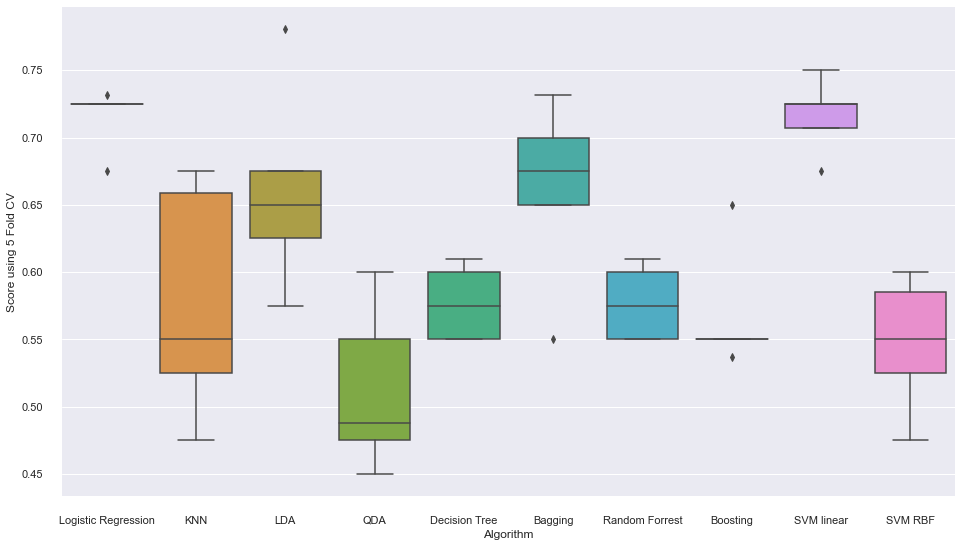

In [14]:
import seaborn as sns

df_5fold = (
    pd.DataFrame(
        pd.concat(
            {k: pd.Series(v) for k, v in scores_5fold.items()},
        )
    )
).reset_index(1).rename({'level_1': 'Fold', 0: 'Score'}, axis=1)

plt.figure(figsize=(16,9))
sns.set_theme(style='darkgrid', palette='Blues_d')
sns.boxplot(x=df_5fold.index, y=df_5fold.Score)
sns.despine(offset=10, trim=True)
plt.xlabel('Algorithm');
plt.ylabel('Score using 5 Fold CV');
plt.savefig('SVSM Classifier Score')

{'Logistic Regression': 0.9010260105133057, 'KNN': 1.1053712368011475, 'LDA': 0.8984999656677246, 'QDA': 0.940270185470581, 'Decision Tree': 1.4603450298309326, 'Bagging': 3.3589489459991455, 'Random Forrest': 3.7663161754608154, 'Boosting': 3.2590479850769043, 'SVM': 1.0349559783935547, 'SVM RBF': 1.2293870449066162}


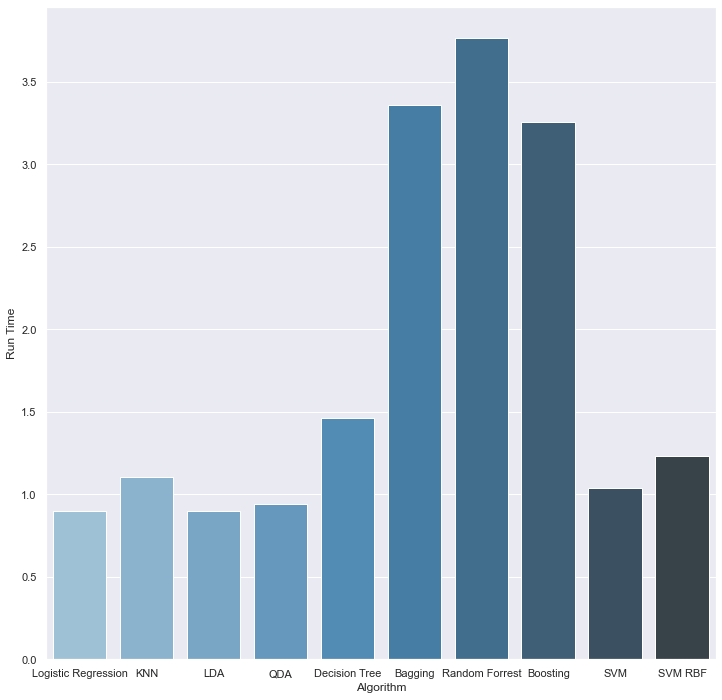

In [15]:
plt.subplots(figsize = (12,12))
print(dic)
ax = sns.barplot(x = list(dic.keys()), y = list(dic.values()), palette="Blues_d") 
plt.xlabel('Algorithm')
plt.ylabel('Run Time')
plt.savefig('SVSM Classifier Running Time')

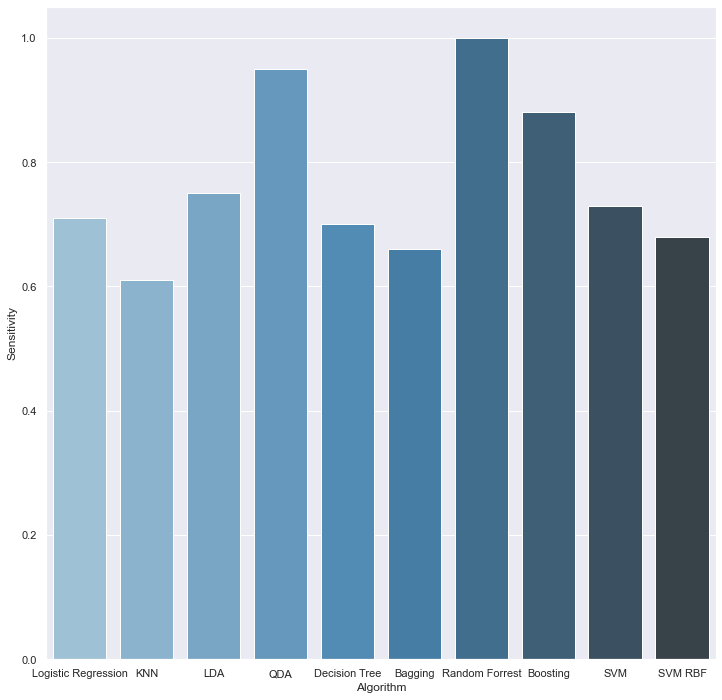

In [16]:
sensitivity = {'Logistic Regression': 0.710, 'KNN': 0.610, 'LDA': 0.750, 'QDA': 0.950, 'Decision Tree': 0.700, 'Bagging': 0.660, 'Random Forrest': 1.0, 'Boosting': 0.880, 'SVM': 0.730, 'SVM RBF': 0.680}
plt.subplots(figsize = (12,12))
ax = sns.barplot(x = list(sensitivity.keys()), y = list(sensitivity.values()), palette="Blues_d") 
plt.xlabel('Algorithm')
plt.ylabel('Sensitivity')
plt.savefig('SVSM Classifier Sensitivity')

[0.8062185104868033, 0.7811581203349498, 0.8107094802216753, 0.8496887512893612, 0.8280364249571568, 0.8406097600457356, 0.8201290724374348, 0.8345194503159442, 0.8345795784312043, 0.8084386937588156]


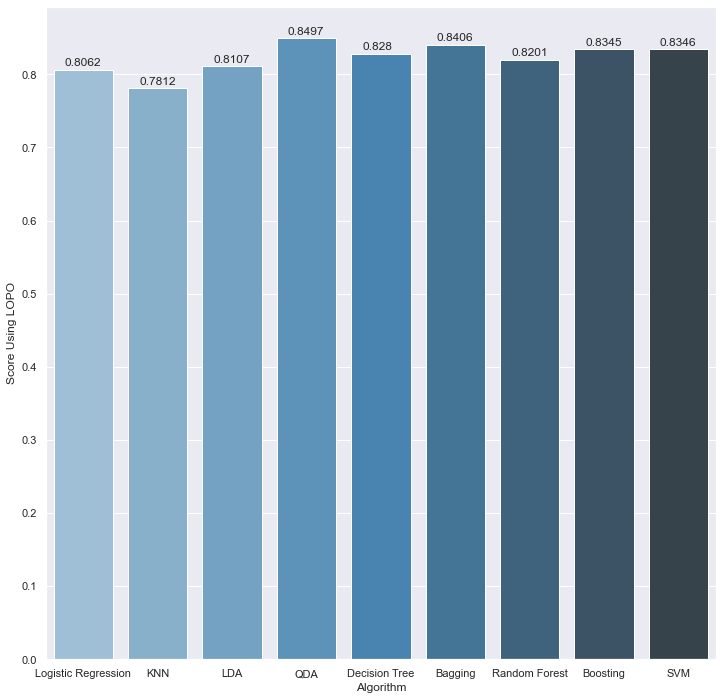

In [18]:
import seaborn as sns
plt.subplots(figsize = (12,12))
err = {}
print(errMean)
xval = ['Logistic Regression', 'KNN', 'LDA', 'QDA', 'Decision Tree', 'Bagging', 'Random Forest', 'Boosting', 'SVM', 'SVM RBF']
for index in range(9):
    err[xval[index]] = errMean[index]
ax = sns.barplot(x = list(err.keys()), y = list(err.values()), palette="Blues_d") 
plt.xlabel('Algorithm')
plt.ylabel('Score Using LOPO')
for index, value in enumerate(list(err.values())):
    plt.text(index-.25, value+.005,
             str(round(value, ndigits = 4)))